In [1]:
import pandas as pd
import xlwings as xw
import numpy as np


In [2]:
import os
os.getcwd()

'C:\\Users\\samee'

In [106]:
df = pd.read_excel("TestFile_1.xlsx")

In [4]:
df.head()

,status,S1,S2,S3,hS3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,...,D7r7,D7r6oe,D8,D9,D10ra,D10rb,D11,qtime,bmi,points
0,Qualified,1,2,52,50-54,3,3,4,3,3,...,0,0,3,115,5,2,Illinois,657.14,21.031478,19
1,Qualified,1,1,39,35-39,3,3,3,2,3,...,0,0,1,275,6,2,Pennsylvania,885.05,35.304054,18
2,Qualified,1,2,30,30-34,4,4,4,4,3,...,0,0,1,150,6,0,Illinois,777.58,20.341435,6
3,Qualified,1,2,21,18-24,3,3,4,3,3,...,0,0,1,150,5,8,Wisconsin,654.48,22.804931,0
4,Qualified,1,1,43,40-44,3,3,3,3,3,...,0,0,4,213,5,7,New0York,437.95,33.356872,20


In [61]:
df.describe()

,Unnamed: 0,S1,S2,S3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,Q1rh,...,D7r6,D7r7,D8,D9,D10ra,D10rb,qtime,bmi,points,label
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.0,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,498.000000,1.241725,1.503511,41.960883,2.592778,2.399198,2.507523,2.741224,2.815446,2.889669,...,0.007021,0.0,2.508526,182.902708,5.175527,5.240722,2275.183290,28.510989,11.313942,9.915747
std,287.953411,0.428343,0.500239,13.353153,0.992273,1.029251,0.914625,0.981371,0.929245,0.817642,...,0.083539,0.0,1.841942,56.946459,0.463836,3.431520,4652.095136,11.113186,14.216369,6.229136
min,0.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,50.000000,3.000000,0.000000,305.880000,3.978044,-32.000000,0.000000
25%,249.000000,1.000000,1.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.0,1.000000,145.000000,5.000000,2.000000,1051.390000,23.294675,1.000000,4.000000
50%,498.000000,1.000000,2.000000,43.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.0,2.000000,175.000000,5.000000,5.000000,1457.660000,27.021424,11.000000,12.000000
75%,747.000000,1.000000,2.000000,53.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,0.000000,0.0,4.000000,210.000000,5.000000,8.000000,2066.440000,32.074985,21.000000,16.000000
max,996.000000,2.000000,2.000000,65.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,0.0,6.000000,500.000000,7.000000,12.000000,71025.590000,271.219136,50.000000,19.000000


In [42]:
df['D4']

0      2
1      1
2       
3      1
4       
      ..
992     
993    1
994    1
995     
996     
Name: D4, Length: 997, dtype: object

In [45]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [86]:
points = df.iloc[:,np.r_[2,3,1119:1154]]

In [82]:
points.head()

,S1,S2,D1ra,D1rb,D1rc,D1rd,D1re,D1rf,D1rg,D1rh,...,D7r6,D7r7,D7r6oe,D8,D9,D10ra,D10rb,D11,qtime,bmi
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,500,3,0,Alaska,1170.76,271.219136
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,5,445,5,3,Colorado,1191.05,78.819602
2,1,2,0,0,0,0,0,0,0,0,...,0,0,0,6,499,5,9,New0Mexico,1133.93,73.681369
3,1,2,0,0,0,1,0,0,0,0,...,0,0,0,3,387,5,5,Ohio,996.54,64.393136
4,1,2,0,0,0,1,0,0,0,0,...,0,0,0,5,370,5,4,Wisconsin,62720.14,63.503418


In [87]:
points = points.drop(['D11','qtime','bmi'], axis=1)
points = points.drop(['D7r6oe'],axis =1)

In [88]:
points.isna().sum()

S1       0
S2       0
D1ra     0
D1rb     0
D1rc     0
D1rd     0
D1re     0
D1rf     0
D1rg     0
D1rh     0
D1ri     0
D1rj     0
D1rk     0
D1rl     0
D1rm     0
D1rn     0
D1ro     0
D2       0
D3       0
D4       0
D5       0
D6       0
D7r1     0
D7r2     0
D7r3     0
D7r4     0
D7r5     0
D7r6     0
D7r7     0
D8       0
D9       0
D10ra    0
D10rb    0
dtype: int64

In [89]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [90]:
mms = MinMaxScaler()
mms.fit(points)
points_transformed = mms.transform(points)

In [91]:
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points_transformed)
    Sum_of_squared_distances.append(km.inertia_)

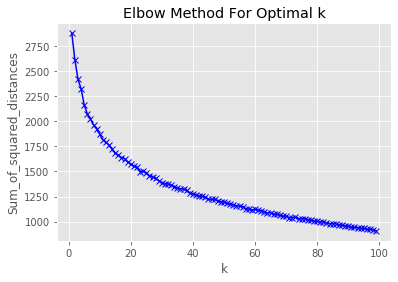

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [93]:
k_clusters = 20
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

In [94]:
algorithms['kmeans'].fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=200, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
algorithms['kmeans'].labels_

array([ 3,  9, 14, 14, 19, 14,  3, 12,  1,  8, 13,  8, 17, 13, 19, 10, 10,
       14,  0,  7,  1,  5,  2,  0,  8,  5, 19,  4,  5, 14, 19,  5,  8, 18,
        8,  8,  8,  7,  4, 12,  4, 18,  9, 12,  9, 12,  9, 10, 12, 17, 19,
       14,  8, 17,  5, 12, 10, 14, 16, 12, 13,  3, 14, 18, 19,  7,  1, 12,
       10, 13,  1,  3,  4,  7,  8,  4,  9, 16, 12, 12, 14, 12,  7, 12, 12,
       14,  9,  8, 10,  8, 10, 17, 14, 16,  8,  8,  0,  5, 14, 12, 18,  0,
       13,  9, 14, 10, 12, 13, 14, 10,  4, 14,  2, 14, 16, 12, 14, 12, 13,
       17, 10,  4,  8, 19,  8, 12,  4,  4, 18,  0, 14,  9, 19, 12,  8,  0,
       14,  8, 10, 19,  9, 14,  7, 14,  4, 17, 18, 10,  6, 16, 17, 19, 10,
       15,  4,  2, 10, 16,  8, 14, 13, 10,  3, 14, 18, 12, 13, 14, 14, 12,
       12,  5,  0,  5,  0,  4,  1, 10,  3,  8,  3,  7, 19,  8,  1, 18,  4,
        7,  0, 17, 17,  4, 12,  5,  0, 16, 16,  7,  4,  5, 10,  8,  5, 13,
       11, 14,  8, 10, 14, 16, 12, 12, 19, 19, 19, 12,  3, 17,  7,  9,  8,
        9,  7, 14,  9,  8

In [103]:
kmeans = KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(points)
kmeans.cluster_centers_.shape

(20, 33)

In [94]:
cluster_labels = kmeans.labels_


In [95]:
df['label'] = cluster_labels

In [73]:
df.describe()

,S1,S2,S3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,Q1rh,Q1ri,...,D7r6,D7r7,D8,D9,D10ra,D10rb,qtime,bmi,points,label
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.0,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,1.241725,1.503511,41.960883,2.592778,2.399198,2.507523,2.741224,2.815446,2.889669,2.647944,...,0.007021,0.0,2.508526,182.902708,5.175527,5.240722,2275.183290,28.510989,11.313942,9.319960
std,0.428343,0.500239,13.353153,0.992273,1.029251,0.914625,0.981371,0.929245,0.817642,0.942860,...,0.083539,0.0,1.841942,56.946459,0.463836,3.431520,4652.095136,11.113186,14.216369,5.755296
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,50.000000,3.000000,0.000000,305.880000,3.978044,-32.000000,0.000000
25%,1.000000,1.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.0,1.000000,145.000000,5.000000,2.000000,1051.390000,23.294675,1.000000,5.000000
50%,1.000000,2.000000,43.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.0,2.000000,175.000000,5.000000,5.000000,1457.660000,27.021424,11.000000,9.000000
75%,1.000000,2.000000,53.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,0.000000,0.0,4.000000,210.000000,5.000000,8.000000,2066.440000,32.074985,21.000000,14.000000
max,2.000000,2.000000,65.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,0.0,6.000000,500.000000,7.000000,12.000000,71025.590000,271.219136,50.000000,19.000000


In [96]:
df.to_excel("TestFile_1.xlsx", "Sheet1")

In [61]:
algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

In [62]:
algorithms['agglom'].fit(points)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=20,
                        pooling_func='deprecated')

In [114]:
df.groupby('D11')['label'].describe()

,count,mean,std,min,25%,50%,75%,max
D11,,,,,,,,
Alabama,15.0,8.200000,4.916445,0.0,4.50,8.0,12.00,16.0
Alaska,3.0,7.000000,5.567764,2.0,4.00,6.0,9.50,13.0
Arizona,22.0,11.227273,6.553311,0.0,5.75,13.5,17.00,18.0
Arkansas,9.0,10.222222,6.320162,0.0,4.00,12.0,15.00,17.0
California,98.0,10.000000,5.516610,0.0,5.50,10.0,14.00,19.0
Colorado,23.0,10.565217,6.781164,0.0,4.00,12.0,16.00,19.0
Connecticut,13.0,7.846154,6.478762,0.0,1.00,8.0,14.00,17.0
Delaware,2.0,10.000000,2.828427,8.0,9.00,10.0,11.00,12.0
District0of0Columbia,1.0,8.000000,NaN,8.0,8.00,8.0,8.00,8.0


In [123]:
df.groupby('label')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,81.0,30.016553,3.713764,22.528441,27.891291,29.267755,32.277319,38.405307
1,76.0,24.741032,3.179054,15.325010,22.938076,24.580044,26.622856,32.918835
2,17.0,47.561299,6.315082,39.867911,43.395062,46.171890,53.741736,58.189734
3,38.0,20.282959,2.011041,15.790039,18.932334,20.041602,21.480556,23.774714
4,71.0,30.185602,3.786606,22.745956,27.537932,29.564769,32.832996,40.390692
5,43.0,37.152187,5.287380,29.642435,33.469550,35.437933,39.151259,52.507900
6,5.0,107.913076,91.824423,53.356384,62.488889,73.681369,78.819602,271.219136
7,21.0,13.669232,6.703939,3.978044,8.088429,14.524793,17.373829,26.545573
8,59.0,26.899861,2.715802,22.246044,25.097456,26.496727,28.215780,36.463048


In [134]:
df_2 = (df.label == 1) | (df.label==3) | (df.label==7) | (df.label==9)| (df.label==13)| (df.label==16)| (df.label==18)| (df.label==19)

In [136]:
new=df[df_2]

In [132]:
df_2.head()

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [137]:
new.groupby('label')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
1,76.0,24.741032,3.179054,15.325010,22.938076,24.580044,26.622856,32.918835
3,38.0,20.282959,2.011041,15.790039,18.932334,20.041602,21.480556,23.774714
7,21.0,13.669232,6.703939,3.978044,8.088429,14.524793,17.373829,26.545573
9,46.0,21.810644,2.674010,13.674263,20.106551,22.220976,23.312510,30.038903
13,59.0,20.245204,3.190142,11.643437,18.534504,20.496097,21.774550,33.244521
16,84.0,24.706808,3.586574,16.754602,22.679328,24.163289,25.976952,42.163783
18,58.0,23.555934,2.567169,18.307292,21.547998,23.642301,25.442298,29.283252
19,60.0,24.864217,2.549889,19.663387,22.961893,24.558876,26.649306,30.228433


In [100]:
from sklearn.decomposition import PCA 
  
pca = PCA(3) 
pca.fit(points) 
  
pca_data = pd.DataFrame(pca.transform(points)) 
  
print(pca_data.head())

            0         1         2
0  317.128213 -5.402063 -0.155265
1  262.131444 -2.693514  2.052013
2  316.103152  3.172103  1.514841
3  204.101750 -0.572399  1.721787
4  187.102314 -1.627134  1.481440


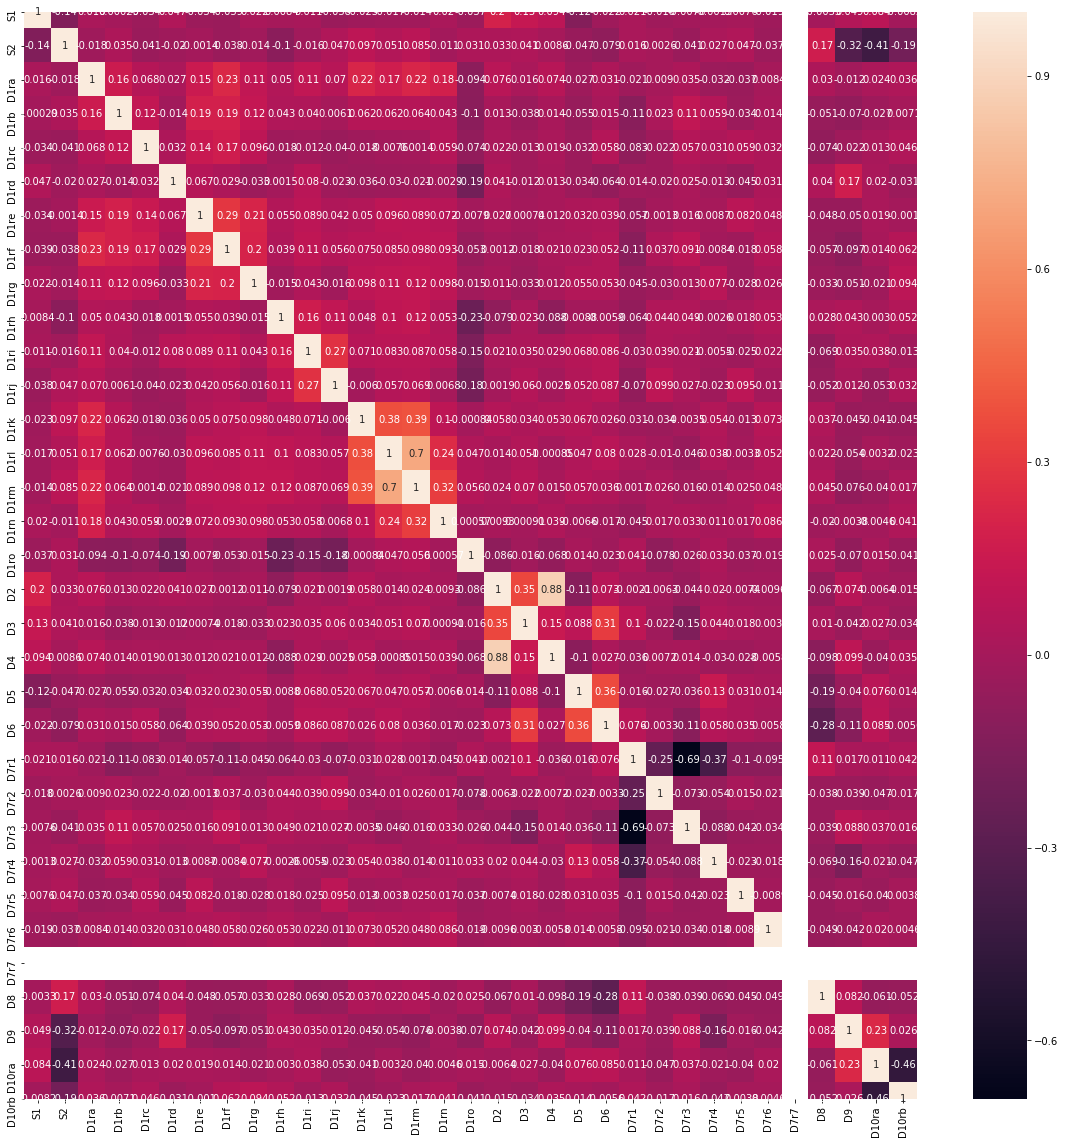

In [96]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import seaborn as sns 
  
# generating correlation heatmap 
sns.heatmap(points.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 

In [101]:
from matplotlib import colors as mcolors 
import math 
clusters = 20 
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

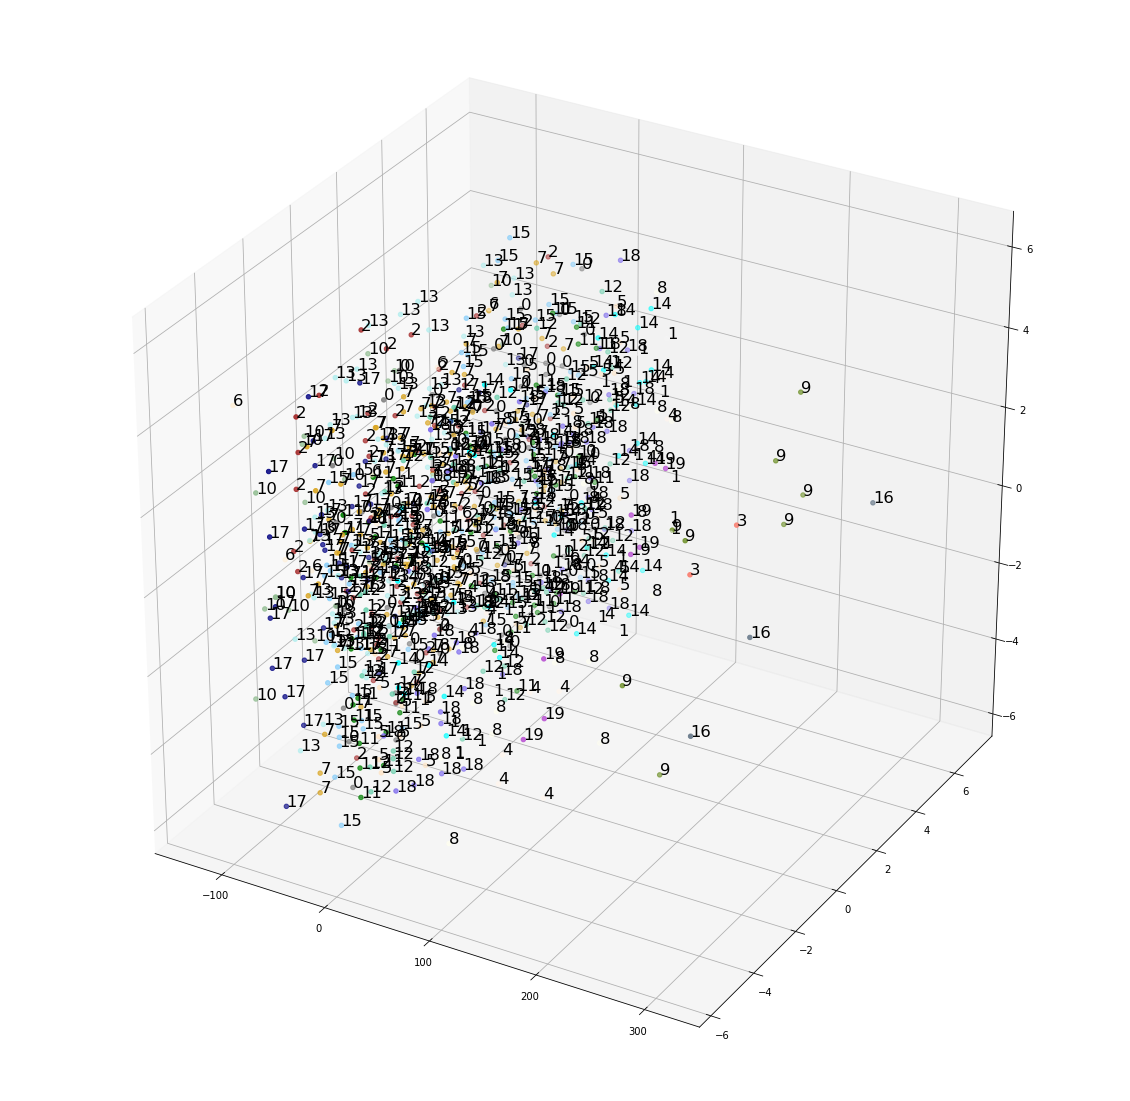

In [104]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

C:\Users\samee\AppData\Roaming\Python\Python37\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


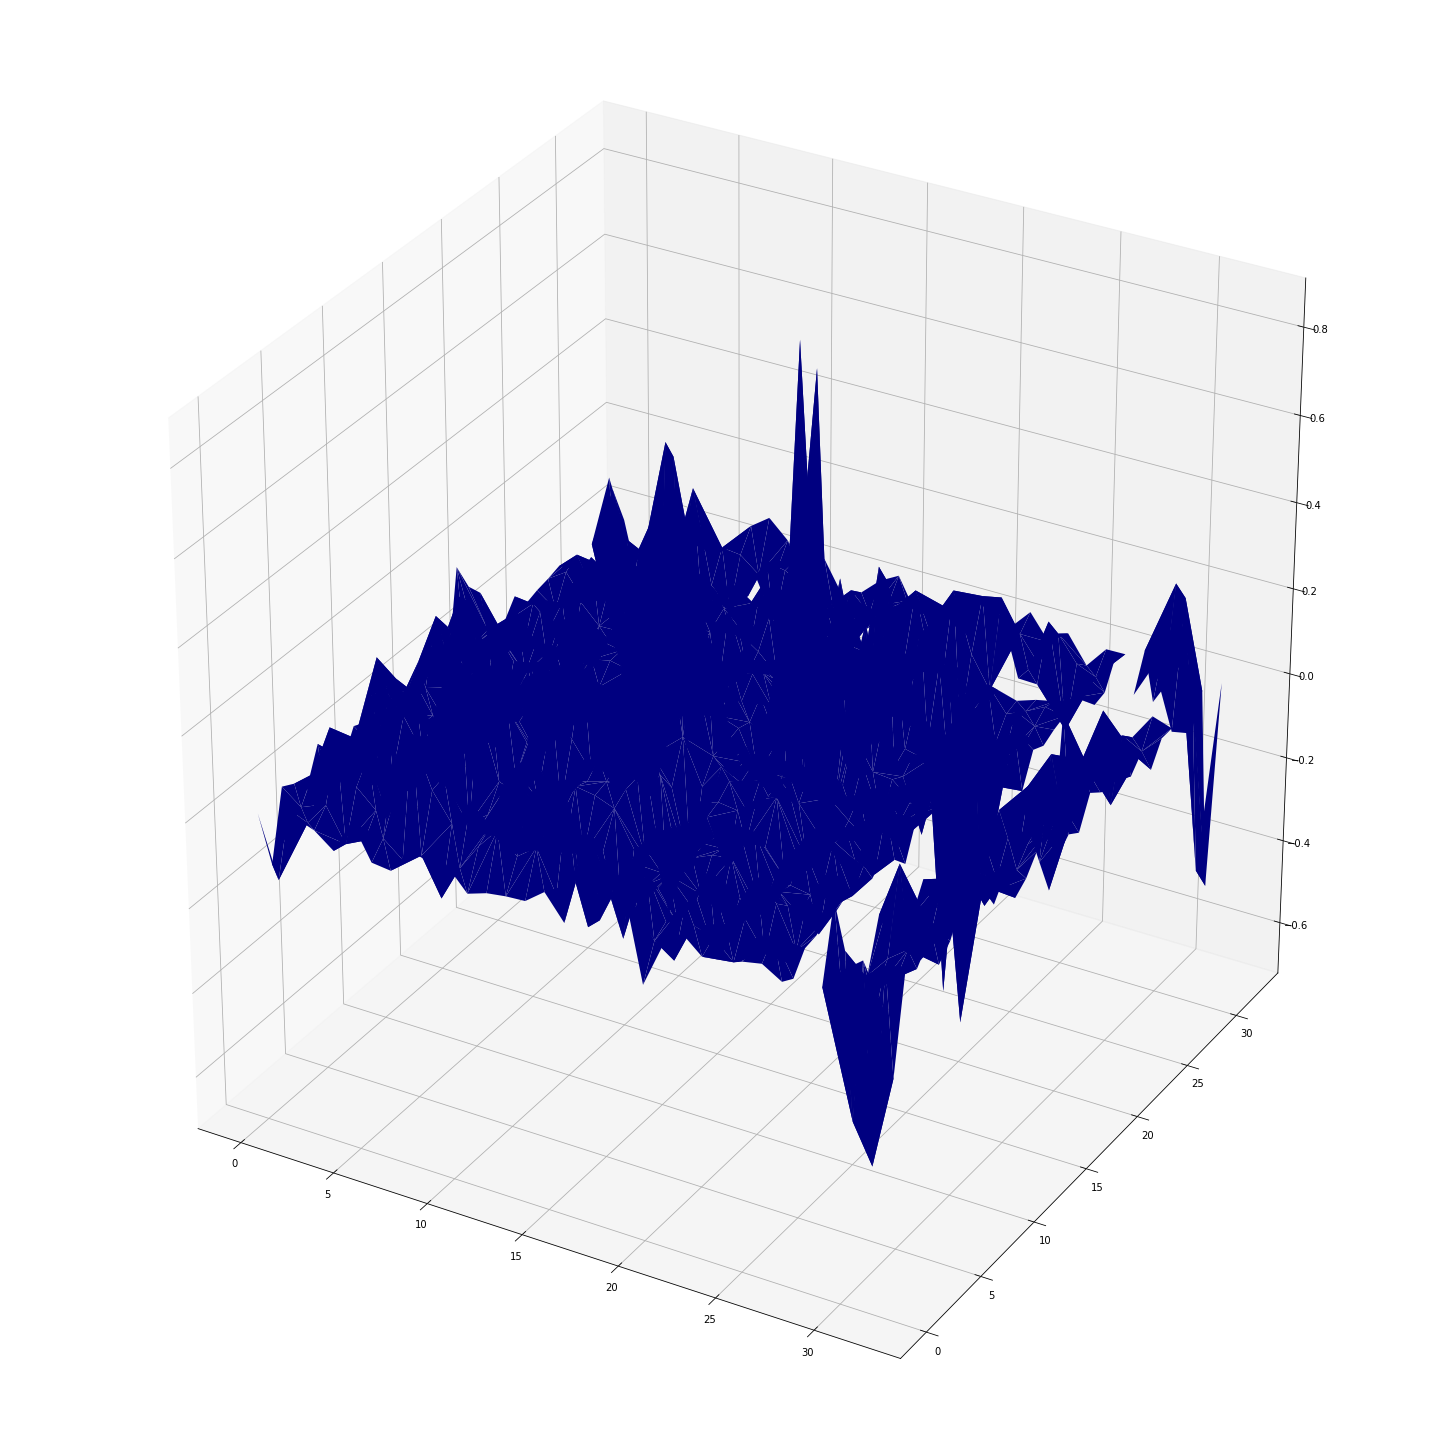

In [105]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   
from matplotlib import cm 
  
# generating correlation data 
df = points.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
''' Generating coordinates with  
corresponding correlation values '''
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 
  
# flattening dataframe values 
for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig = plt.figure() 
ax = Axes3D(fig) 
  
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show() 


In [117]:
label_1 = df[df['label']== 1]
label_3 = df[df['label']== 3]
label_7 = df[df['label']== 7]
label_9 = df[df['label']== 9]
label_13 = df[df['label']== 13]
label_16 = df[df['label']== 16]
label_18 = df[df['label']== 18]
label_19 = df[df['label']== 19]

In [114]:
clusters = df[df['label']== '1']

C:\Users\samee\AppData\Roaming\Python\Python37\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [118]:
label_1.describe()

,Unnamed: 0,S1,S2,S3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,Q1rh,...,D7r6,D7r7,D8,D9,D10ra,D10rb,qtime,bmi,points,label
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,467.671053,1.197368,1.394737,31.381579,2.381579,2.368421,2.328947,2.565789,2.750000,3.223684,...,0.013158,0.0,1.776316,163.723684,5.210526,6.078947,1882.674737,24.741032,21.578947,1.0
std,312.956371,0.400657,0.492042,6.462130,0.951730,1.043610,0.900195,0.869261,1.021437,0.722933,...,0.114708,0.0,1.281652,8.600153,0.441687,3.708596,2353.740195,3.179054,8.346278,0.0
min,9.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,150.000000,5.000000,0.000000,384.540000,15.325010,4.000000,1.0
25%,182.000000,1.000000,1.000000,25.750000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.0,1.000000,156.750000,5.000000,3.000000,886.862500,22.938076,15.750000,1.0
50%,452.500000,1.000000,1.000000,31.500000,2.500000,2.500000,2.000000,3.000000,3.000000,3.000000,...,0.000000,0.0,1.000000,165.000000,5.000000,6.000000,1208.915000,24.580044,20.500000,1.0
75%,724.250000,1.000000,2.000000,36.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,0.0,2.000000,170.000000,5.000000,10.000000,1783.615000,26.622856,25.500000,1.0
max,993.000000,2.000000,2.000000,45.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,0.0,5.000000,180.000000,7.000000,11.000000,16231.970000,32.918835,50.000000,1.0


In [5]:
label_1

,Unnamed: 0,status,S1,S2,S3,hS3,Q1ra,Q1rb,Q1rd,Q1re,...,D7r6oe,D8,D9,D10ra,D10rb,D11,qtime,bmi,points,label
214,883,Qualified,1,2,37,35-39,2,2,3,3,...,0,2,180,5,2,Iowa,2993.23,32.918835,19,1
285,501,Qualified,2,2,32,30-34,3,1,2,3,...,0,2,164,5,1,Missouri,2190.59,30.984144,12,1
288,462,Qualified,1,2,29,25-29,2,3,2,2,...,0,1,180,5,4,Pennsylvania,940.47,30.893555,30,1
301,183,Qualified,1,2,22,18-24,4,1,1,4,...,0,5,157,5,0,Ohio,1135.12,30.658611,20,1
308,195,Qualified,1,2,22,18-24,3,3,3,3,...,0,1,172,5,3,New0York,1278.39,30.465105,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,95,Qualified,1,1,27,25-29,3,2,3,2,...,0,1,150,5,11,Connecticut,399.00,20.918469,25,1
904,959,Qualified,1,1,35,35-39,4,4,4,3,...,0,2,170,6,5,Virginia,699.13,20.156856,18,1
968,9,Qualified,1,1,20,18-24,3,4,2,3,...,0,4,165,6,10,Michigan,511.20,17.250892,9,1
974,574,Qualified,1,1,37,35-39,1,4,1,2,...,0,1,160,6,10,Florida,1325.87,16.728138,39,1


In [43]:
label_1.describe()

,Unnamed: 0,S1,S2,S3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,Q1rh,...,D7r6,D7r7,D8,D9,D10ra,D10rb,qtime,bmi,points,label
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,467.671053,1.197368,1.394737,31.381579,2.381579,2.368421,2.328947,2.565789,2.750000,3.223684,...,0.013158,0.0,1.776316,163.723684,5.210526,6.078947,1882.674737,24.741032,21.578947,1.0
std,312.956371,0.400657,0.492042,6.462130,0.951730,1.043610,0.900195,0.869261,1.021437,0.722933,...,0.114708,0.0,1.281652,8.600153,0.441687,3.708596,2353.740195,3.179054,8.346278,0.0
min,9.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,150.000000,5.000000,0.000000,384.540000,15.325010,4.000000,1.0
25%,182.000000,1.000000,1.000000,25.750000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.0,1.000000,156.750000,5.000000,3.000000,886.862500,22.938076,15.750000,1.0
50%,452.500000,1.000000,1.000000,31.500000,2.500000,2.500000,2.000000,3.000000,3.000000,3.000000,...,0.000000,0.0,1.000000,165.000000,5.000000,6.000000,1208.915000,24.580044,20.500000,1.0
75%,724.250000,1.000000,2.000000,36.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,0.0,2.000000,170.000000,5.000000,10.000000,1783.615000,26.622856,25.500000,1.0
max,993.000000,2.000000,2.000000,45.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,0.0,5.000000,180.000000,7.000000,11.000000,16231.970000,32.918835,50.000000,1.0


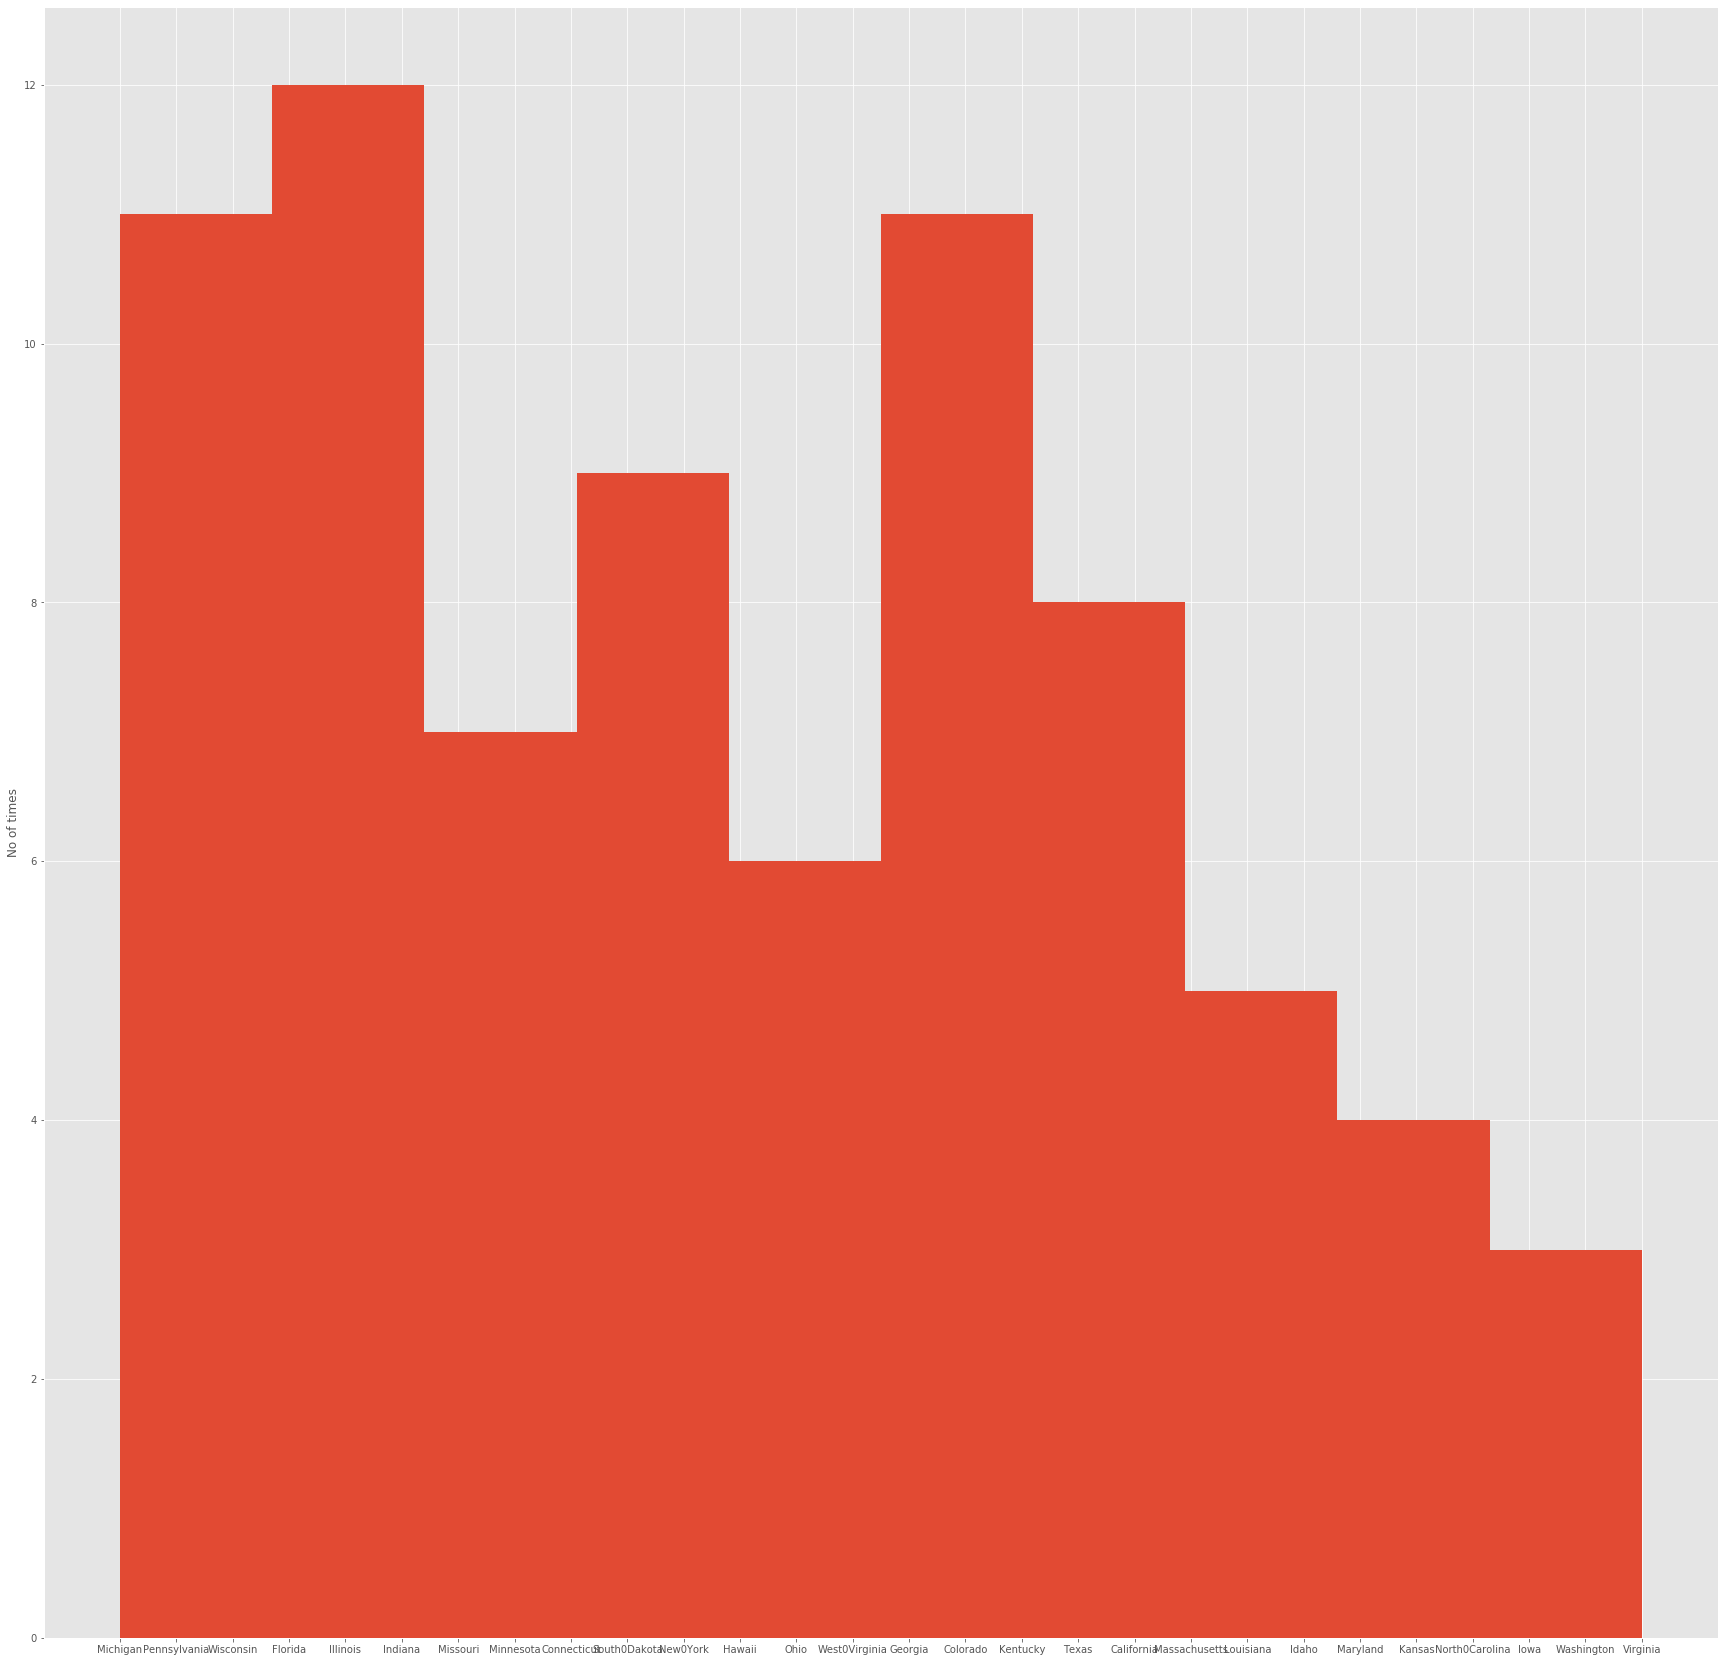

In [157]:
x = label_1.D11
plt.hist(x)
plt.ylabel('No of times')
plt.show()

In [16]:
#assessing label_1

dataf = label_1[['Q25','Q26ra','Q26rb','Q26rc','Q26rd','Q26re','Q26rf','Q26rg','Q26rh','Q27A','bmi','points','D11']]

In [8]:
dataf.describe()

,Q25,Q26ra,Q26rb,Q26rc,Q26rd,Q26re,Q26rf,Q26rg,Q26rh,Q27A
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.815789,0.131579,0.105263,0.276316,0.157895,0.355263,0.052632,0.184211,0.118421,0.473684
std,0.390232,0.340279,0.308931,0.450146,0.367065,0.481773,0.224781,0.390232,0.325253,1.446593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


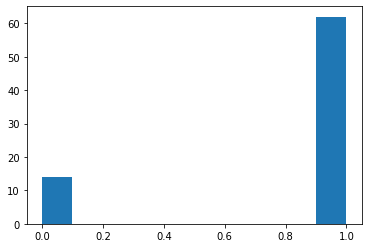

In [11]:
x = dataf['Q25']
plt.hist(x)
plt.show()

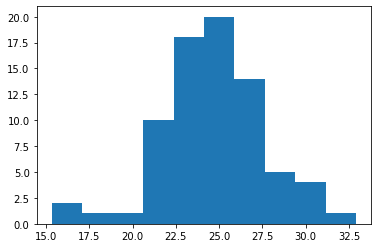

In [13]:
x = dataf['bmi']
plt.hist(x)
plt.show()

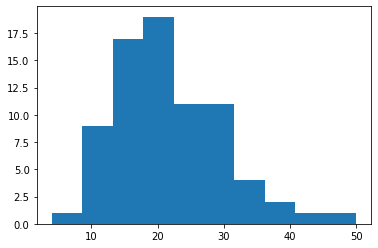

In [14]:
x = dataf['points']
plt.hist(x)
plt.show()

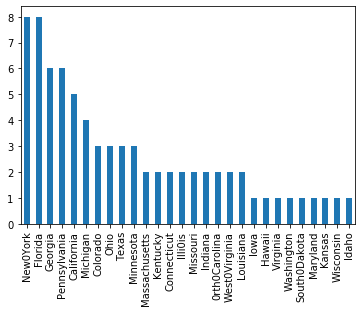

In [24]:
dataf['D11'].value_counts().plot(kind='bar');

In [27]:

dataf2 = label_3[['Q25','Q26ra','Q26rb','Q26rc','Q26rd','Q26re','Q26rf','Q26rg','Q26rh','Q27A','bmi','points','D11']]

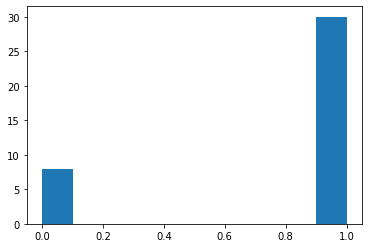

In [28]:
x = dataf2['Q25']
plt.hist(x)
plt.show()

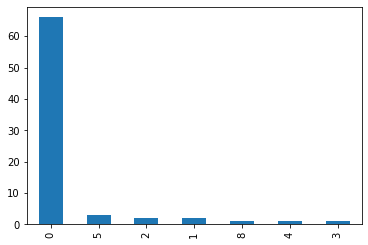

In [37]:


dataf['Q27A'].value_counts().plot(kind='bar');

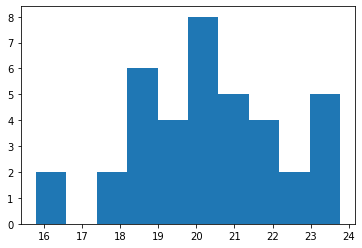

In [29]:
x = dataf2['bmi']
plt.hist(x)
plt.show()

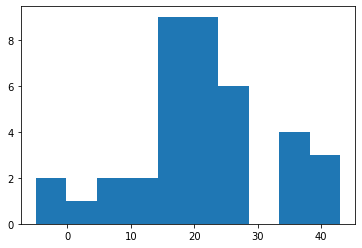

In [30]:
x = dataf2['points']
plt.hist(x)
plt.show()

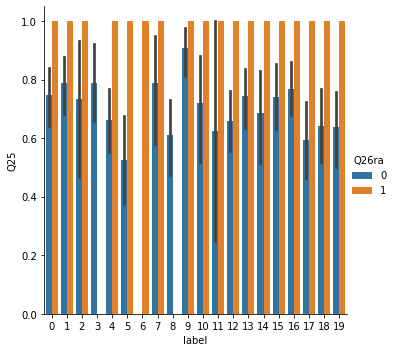

In [55]:
sns.catplot(x="label", y="Q25",kind="bar",hue="Q26ra", data=df)

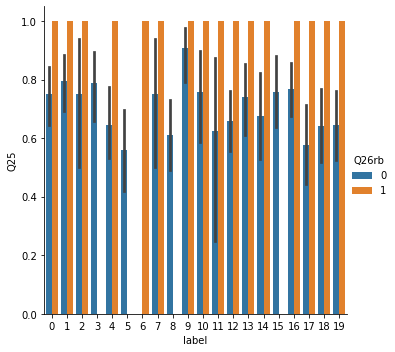

In [59]:
sns.catplot(x="label", y='Q25',kind="bar",hue="Q26rb", data=df)

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
corr=df.corr()

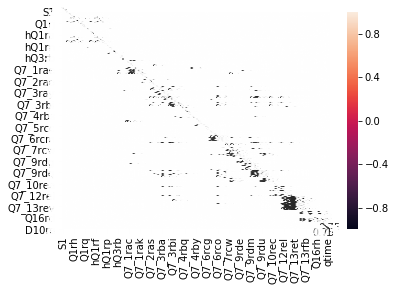

In [6]:
sn.heatmap(corr, annot=True)
plt.show()

In [6]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [24]:
df['points'].describe()

count     1003
unique      76
top         21
freq        35
Name: points, dtype: int64

In [25]:
df['points'].isna().sum()

0

In [15]:
df['bmi'].isna().sum()

0

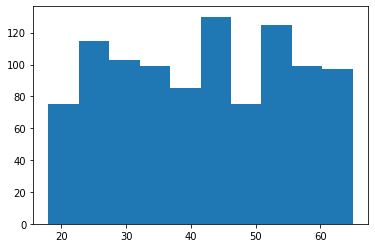

In [30]:
x = df['S3']
plt.hist(x)
plt.show()

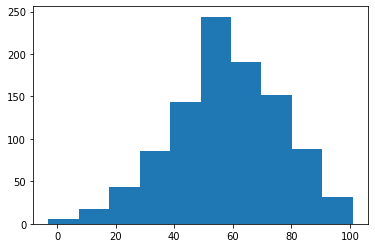

In [42]:
y = df['points_1']
plt.hist(y)
plt.show()

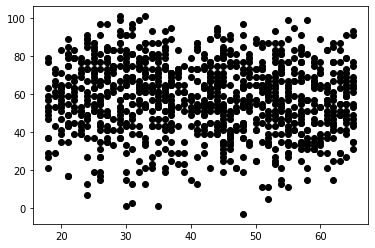

In [88]:
plt.plot(x, y,'o', color='black')

In [13]:
df['points'].describe()


count    997.000000
mean      11.313942
std       14.216369
min      -32.000000
25%        1.000000
50%       11.000000
75%       21.000000
max       50.000000
Name: points, dtype: float64

In [20]:
# create kmeans object
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[21.39864865 26.66806313  1.46959459 54.13175676]
 [-2.69501466 34.04157179  1.45747801 45.3313783 ]
 [16.29166667 24.78759267  1.575      28.76111111]]


In [21]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

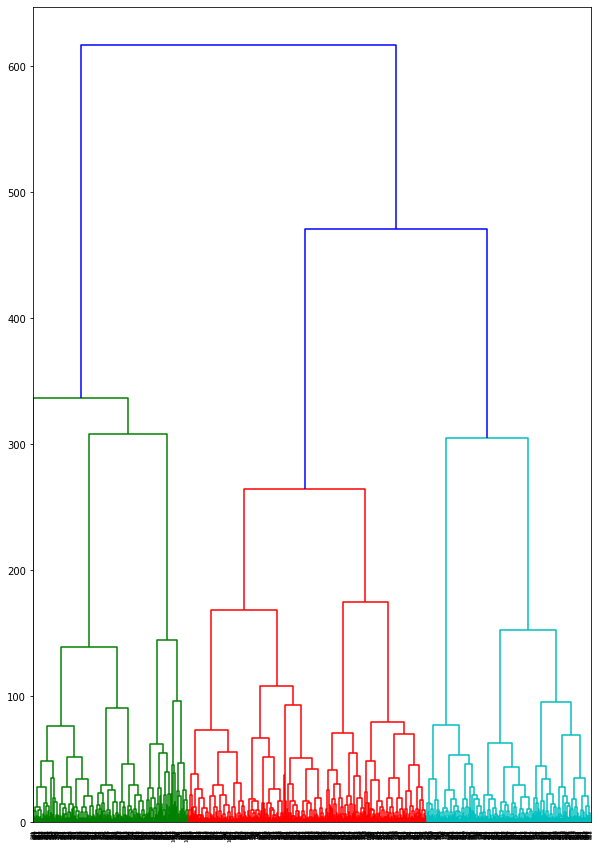

In [130]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)


In [112]:
kmeans = KMeans(n_clusters=3) # You want cluster the passenger records into 2: fit or not fit
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [114]:
>>> from sklearn.decomposition import PCA
>>> from sklearn.datasets import load_iris
>>> pca = PCA(n_components=2).fit(points)
>>> pca_2d = pca.transform(points)

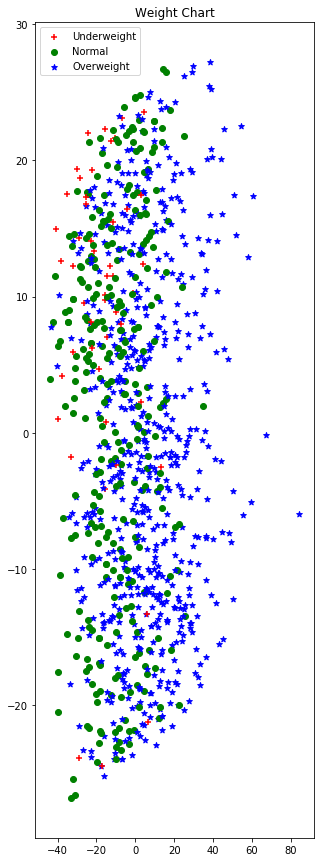

In [126]:
>>> import pylab as pl
>>> for i in range(0, pca_2d.shape[0]):
>>>  if points.bmi[i] <= 18.5 :
>>>   c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
>>>  elif points.bmi[i] <= 24.9 :
>>>   c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
>>>  elif points.bmi[i] > 25:
>>>   c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
>>> pl.legend([c1, c2, c3], ['Underweight', 'Normal',
    'Overweight'])
>>> pl.title('Weight Chart')
>>> pl.show()

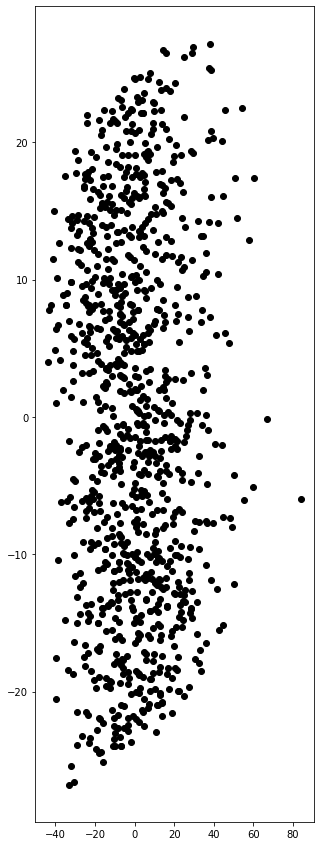

In [127]:
>>> pl.scatter(pca_2d[:,0],pca_2d[:,1],c='black')
>>> pl.show()

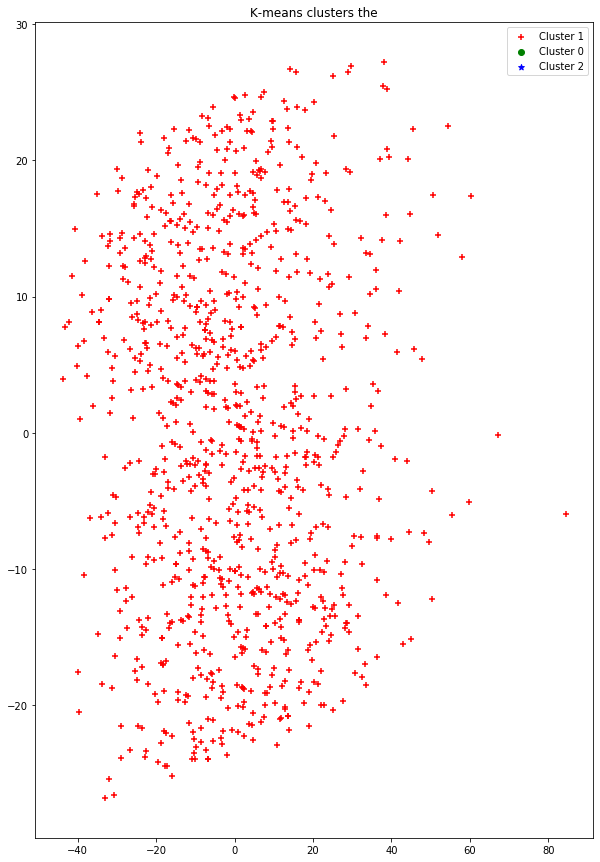

In [129]:
>>> for i in range(0, pca_2d.shape[0]):
>>>  if kmeans.labels_[i] >= 18.5 or kmeans.labels_[i] <= 24.8:
>>>   c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
>>>  elif kmeans.labels_[i] <= 24.9 or kmeans.labels_[i] >= 18.6 :
>>>   c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
>>>  elif kmeans.labels_[i] > 25:
>>>   c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
>>> pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
>>> pl.title('K-means clusters the')
>>> pl.show()

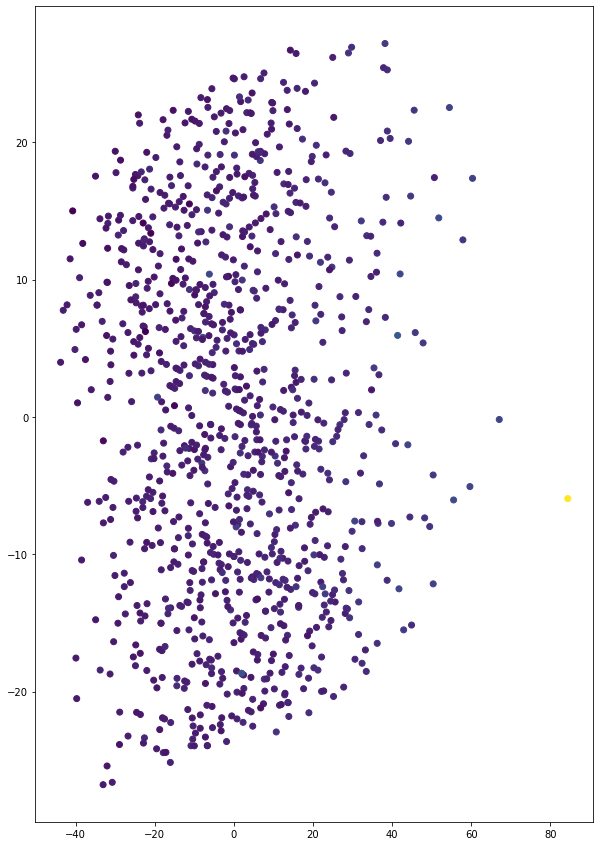

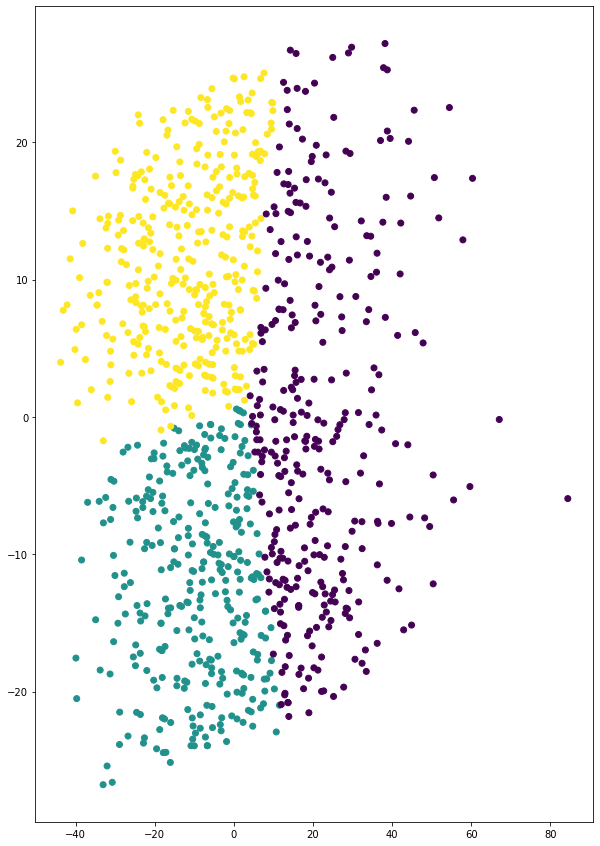

In [131]:
>>> from sklearn.decomposition import PCA
>>> from sklearn.cluster import KMeans
>>> from sklearn.datasets import load_iris
>>> import pylab as pl
>>>
>>> pca = PCA(n_components=2).fit(points)
>>> pca_2d = pca.transform(points)
>>> pl.figure('Reference Plot')
>>> pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=points.bmi)
>>> kmeans = KMeans(n_clusters=3, random_state=111)
>>> kmeans.fit(points)
>>> pl.figure('K-means with 3 clusters')
>>> pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
>>> pl.show()

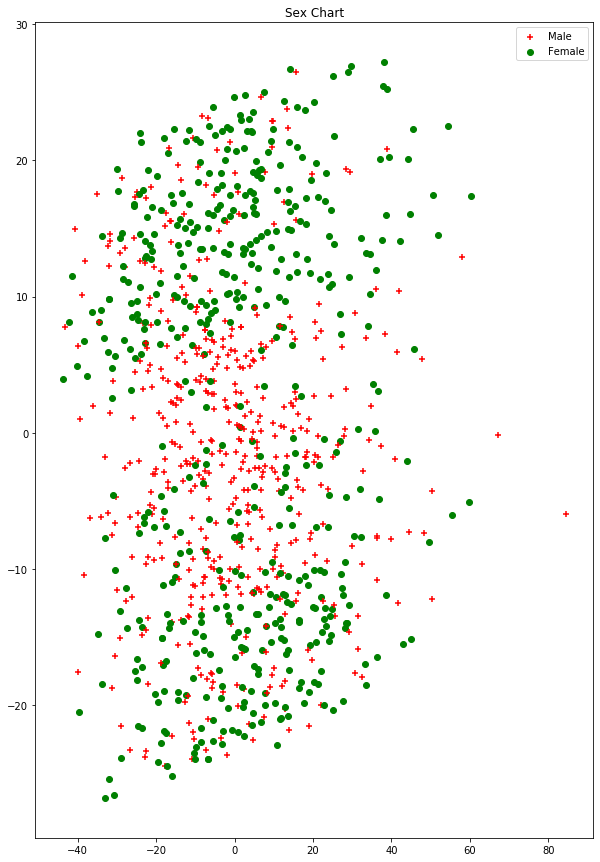

In [132]:
>>> import pylab as pl
>>> for i in range(0, pca_2d.shape[0]):
>>>  if points.S2[i] == 1 :
>>>   c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
>>>  elif points.S2[i] == 2 :
>>>   c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
>>> pl.legend([c1, c2], ['Male', 'Female'])
>>> pl.title('Sex Chart')
>>> pl.show()

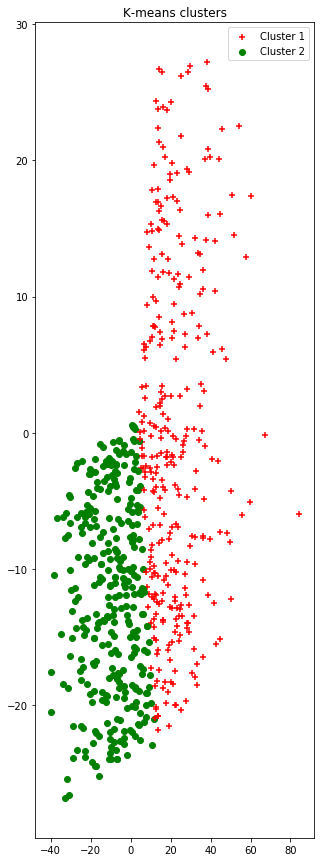

In [124]:
>>> for i in range(0, pca_2d.shape[0]):
>>>  if kmeans.labels_[i] ==1 :
>>>   c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
>>>  elif kmeans.labels_[i] == 2 :
>>>   c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
>>> pl.legend([c1, c2],['Cluster 1', 'Cluster 2'])
>>> pl.title('K-means clusters')
>>> pl.show()

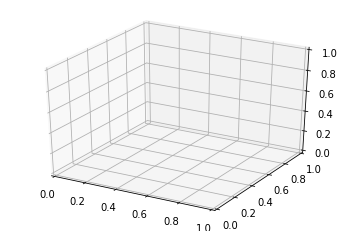

In [89]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

In [120]:
fig = plt.figure()
ax = plt.axes(projection="3d")
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15


z_points = points.bmi
x_points = points.S3
y_points = points.points_1
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [43]:
f1 = df['bmi'].values
f2 = float(df['points_1'])
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

TypeError: cannot convert the series to <class 'float'>

In [17]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [18]:
df['S1']

0       1
1       1
2       1
3       1
4       1
       ..
998     1
999     2
1000    1
1001    1
1002    1
Name: S1, Length: 1003, dtype: int64

In [51]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
x = df.loc[:,['S2','S3','Q1ra','Q1rb','Q1rd','Q1re','Q1rf','Q1rh','Q1ri']]
y = df['S1']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [53]:
logistic_regression = LogisticRegression()

In [54]:
logistic_regression.fit(x_train,y_train)

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = logistic_regression.predict(x_test)

In [56]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

77.29083665338645

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87       194
           2       0.00      0.00      0.00        57

    accuracy                           0.77       251
   macro avg       0.39      0.50      0.44       251
weighted avg       0.60      0.77      0.67       251



C:\Users\samee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'logreg' is not defined

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

C:\Users\samee\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


ValueError: endog must be in the unit interval.

In [32]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[224   0]
 [ 77   0]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85       224
           2       0.00      0.00      0.00        77

    accuracy                           0.74       301
   macro avg       0.37      0.50      0.43       301
weighted avg       0.55      0.74      0.64       301



C:\Users\samee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: Data is not binary and pos_label is not specified

In [6]:
df['Derived']= df['Q1ra']+df['Q1rb']

In [7]:
df.head()

,status,S1,S2,S3,hS3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,...,D7r6,D7r7,D7r6oe,D8,D9,D10ra,D10rb,D11,qtime,Derived
0,Qualified,1,2,52,50-54,3,3,4,3,3,...,NO TO: Other ( please specify),NO TO: Decline to answer,,"Not currently employed, but looking for work",115,5,2,Illinois,657.14,6
1,Qualified,1,1,39,35-39,3,3,3,2,3,...,NO TO: Other ( please specify),NO TO: Decline to answer,,Work full time,275,6,2,Pennsylvania,885.05,6
2,Qualified,1,2,30,30-34,4,4,4,4,3,...,NO TO: Other ( please specify),NO TO: Decline to answer,,Work full time,150,6,0,Illinois,777.58,8
3,Qualified,1,2,21,18-24,3,3,4,3,3,...,NO TO: Other ( please specify),NO TO: Decline to answer,,Work full time,150,5,8,Wisconsin,654.48,6
4,Qualified,1,1,43,40-44,3,3,3,3,3,...,NO TO: Other ( please specify),NO TO: Decline to answer,,Not currently employed,213,5,7,New York,437.95,6


In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df['POINTS']


0        19
1        18
2         6
3         0
4        20
       ... 
998       8
999      28
1000    -18
1001     15
1002    -15
Name: POINTS, Length: 1003, dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Columns: 1152 entries, status to qtime
dtypes: float64(1), int64(190), object(961)
memory usage: 8.8+ MB


In [25]:
df.isna().sum()

status    0
S1        0
S2        0
S3        0
hS3       0
         ..
D9        0
D10ra     0
D10rb     0
D11       0
qtime     0
Length: 1152, dtype: int64

In [59]:
X = np.array(df.iloc[:,55]).asfloat()

AttributeError: 'numpy.ndarray' object has no attribute 'asfloat'

In [47]:
X.asfloat()

AttributeError: 'numpy.ndarray' object has no attribute 'asfloat'

In [58]:
kmeans5 = KMeans(n_clusters=2)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
y = np.array(df['S2'])

In [26]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

ValueError: could not convert string to float: 'Rarely or 1'

In [9]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

ValueError: could not convert string to float: 